In [459]:
import wrangle as wr
import explore as ex
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [438]:
url = wr.get_connection('curriculum_logs')

In [439]:
query = """SELECT * FROM curriculum_logs.logs as l
                        JOIN curriculum_logs.cohorts as c ON c.id=l.cohort_id;"""

In [440]:
df1 = wr.check_file_exists('logs.csv', query, url)
df1

csv file found and loaded


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847326,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847327,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847328,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2


In [441]:
df1.columns.tolist()

['date',
 'time',
 'path',
 'user_id',
 'cohort_id',
 'ip',
 'id',
 'name',
 'slack',
 'start_date',
 'end_date',
 'created_at',
 'updated_at',
 'deleted_at',
 'program_id']

In [442]:
df1.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id          0
ip                 0
id                 0
name               0
slack              0
start_date         0
end_date           0
created_at         0
updated_at         0
deleted_at    847330
program_id         0
dtype: int64

In [443]:
def prep_logs(df):
    """
    Preprocesses the given DataFrame by combining 'date' and 'time' columns into 'access_date',
    dropping unnecessary columns, renaming columns, converting date and time columns to datetime,
    """
    # basic column dropping and renaming
    df['access_date'] = df.apply(lambda row: str(row['date']) + ' ' + str(row['time']), axis=1)
    df = df.drop(columns={ 'id', 'slack', 'deleted_at', 'date', 'time'})
    df = df.rename(columns={'name': 'cohort', 'created_at': 'created', 'updated_at': 'updated'})
    
    # changed datatypes
    df['start_date'] = df['start_date'].astype('datetime64')
    df['end_date'] = df['end_date'].astype('datetime64')
    df['created'] = df['created'].astype('datetime64')
    df['updated'] = df['updated'].astype('datetime64')
    df['access_date'] = df['access_date'].astype('datetime64')
    
    # mapped null cohort_ids with selected numbers (no ranking)
    df['program'] = df['program_id'].map({1: 'web dev', 2: 'web dev', 3: 'data science', 4: 'frontend'})
    df['cohort_id'] = df['cohort_id'].astype(int)

    # grabs the lesson from path
    df['lesson'] = df['path'].str.split('/').str[-2]
    
    # grabs the endpoint from the lesson
    df['endpoint'] = df['path'].str.split('/').str[-1]
    
    return df

In [444]:
df = wr.prep_logs(df1)

In [445]:
df

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
0,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:55:03,web dev,,
1,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:02,web dev,NaN,java-ii
2,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:05,web dev,java-ii,object-oriented-programming
3,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,2018-01-26 09:56:06,web dev,slides,object_oriented_programming
4,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2018-01-26 09:56:24,web dev,javascript-i,conditionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847325,jquery/personal-site,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2021-04-21 16:41:51,web dev,jquery,personal-site
847326,jquery/mapbox-api,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2021-04-21 16:42:02,web dev,jquery,mapbox-api
847327,jquery/ajax/weather-map,64,28,71.150.217.33,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2021-04-21 16:42:09,web dev,ajax,weather-map
847328,anomaly-detection/discrete-probabilistic-methods,744,28,24.160.137.86,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2021-04-21 16:44:37,web dev,anomaly-detection,discrete-probabilistic-methods


### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [446]:
df.lesson.value_counts().head(5)

javascript-i    53125
mysql           52560
                45912
java-ii         40748
fundamentals    40691
Name: lesson, dtype: int64

In [447]:
df.program.value_counts()

web dev         743913
data science    103412
frontend             5
Name: program, dtype: int64

In [448]:
data_series = df[(df['program'] == 'data science') & (df['cohort'] != 'Staff')&(df['lesson']!='')].lesson.value_counts().head(7)[2:6]

In [449]:
web_dev_series = df[(df['program'] == 'web dev') & (df['cohort'] != 'Staff')&(df['lesson']!='')].lesson.value_counts().head(5)

In [450]:
front_series = df[(df['program'] == 'frontend') & (df['cohort'] != 'Staff')&(df['lesson']!='')].lesson.value_counts().head(7)[2:6]

In [451]:
# fundamentals is accessed the most across the whole dataset - break into per program

In [452]:
# fundamentals for data science, mysql for web dev - go per cohort now

In [453]:
# per lesson, per program, per cohort
data_fundies_cohort = df[(df['lesson'] == 'fundamentals') & (df['program'] == 'data science') & (df['cohort'] != 'Staff')].cohort.value_counts().head(5)
data_fundies_cohort

Florence    2989
Easley      2103
Darden      1972
Curie        439
Bayes        174
Name: cohort, dtype: int64

In [454]:
# per lesson, per program, per cohort
web_java_cohort = df[(df['lesson'] == 'mysql') & (df['program'] == 'web dev')  & (df['cohort'] != 'Staff')].cohort.value_counts().head(10)
web_java_cohort

Voyageurs    3176
Zion         3118
Teddy        2929
Jupiter      2877
Ceres        2858
Deimos       2846
Fortuna      2845
Apex         2539
Xanadu       2460
Ganymede     2445
Name: cohort, dtype: int64

In [455]:
# per lesson, per program, per cohort
front_images_cohort = df[(df['lesson'] == 'images') & (df['program'] == 'frontend') & (df['cohort'] != 'Staff')].cohort.value_counts()
front_images_cohort

Apollo    1
Name: cohort, dtype: int64

In [474]:
def plot_one(df):
    '''This function plots question one findings'''
    data_series = df[(df['program'] == 'data science') & (df['cohort'] != 'Staff')&(df['lesson']!='')].lesson.value_counts().head(5)
    web_dev_series = df[(df['program'] == 'web dev') & (df['cohort'] != 'Staff')&(df['lesson']!='')].lesson.value_counts().head(5)    
    front_series = df[(df['program'] == 'frontend') & (df['cohort'] != 'Staff')&(df['lesson']!='')].lesson.value_counts().head(7)[2:6]
    
    plt.subplot(221)
    data_series.plot(kind='bar')
    plt.title('Most Visited Lessons for Data Science Program')
    plt.xticks(rotation=45)
    plt.show()

    plt.subplot(222)
    web_dev_series.plot(kind='bar')
    plt.title('Most Visited Lessons for Web Dev Program')
    plt.xticks(rotation=45)
    plt.show()

    plt.subplot(223)
    front_series.plot(kind='bar')
    plt.title('Most Visited Lessons for Frontend Program')
    plt.xticks(rotation=45)
    plt.show()

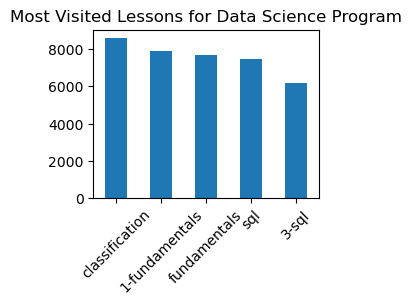

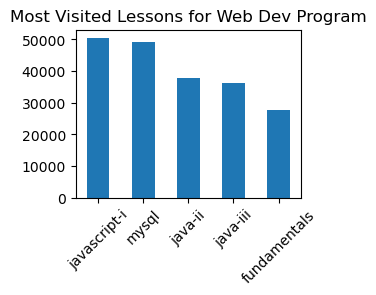

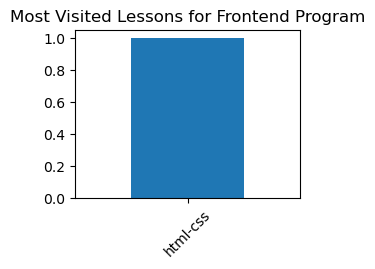

In [475]:
plot_one(df)

In [435]:
def plot_one_pings(df):
    '''This functions plots the findings to question one per cohort'''
    data_fundies_cohort = df[(df['lesson'] == 'fundamentals') & (df['program'] == 'data science') & (df['cohort'] != 'Staff')].cohort.value_counts().head(5)
    web_java_cohort = df[(df['lesson'] == 'mysql') & (df['program'] == 'web dev')  & (df['cohort'] != 'Staff')].cohort.value_counts().head(5)
    front_images_cohort = df[(df['lesson'] == 'images') & (df['program'] == 'frontend') & (df['cohort'] != 'Staff')].cohort.value_counts()

    plt.subplot(221)
    data_fundies_cohort.plot(kind='bar')
    plt.title('Fundamentals Pings per Data Science Cohort')
    
    plt.subplot(222)
    web_java_cohort.plot(kind='bar')
    plt.title('Java Pings per Web Dev Cohort')
    
    plt.subplot(223)
    front_images_cohort.plot(kind='bar')
    plt.title('Image Pings per Frontend Cohort')
    plt.tight_layout(pad=4.0)
    plt.subplots_adjust(left=0.1,
                bottom=0,
                right=0.9,
                top=1.5,
                wspace=0.6,
                hspace=0.6)

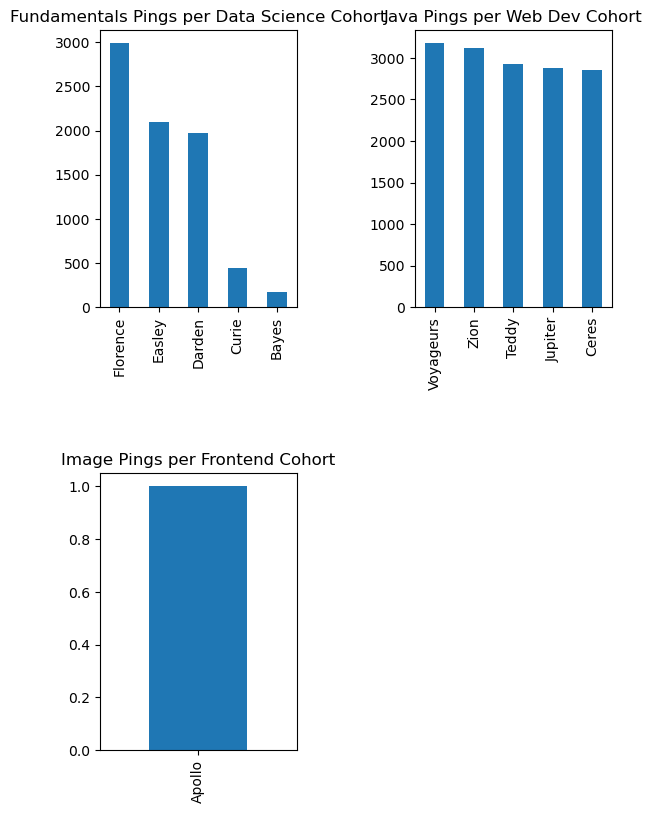

In [436]:
plot_one_pings(df)

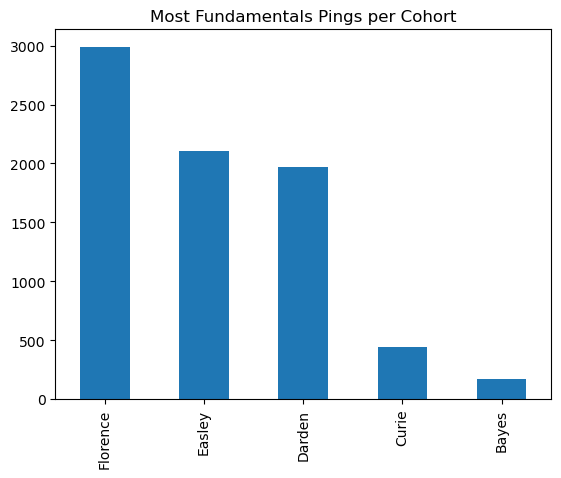

In [266]:
data_fundies_cohort.plot(kind='bar')
plt.title('Most Fundamentals Pings per Cohort');

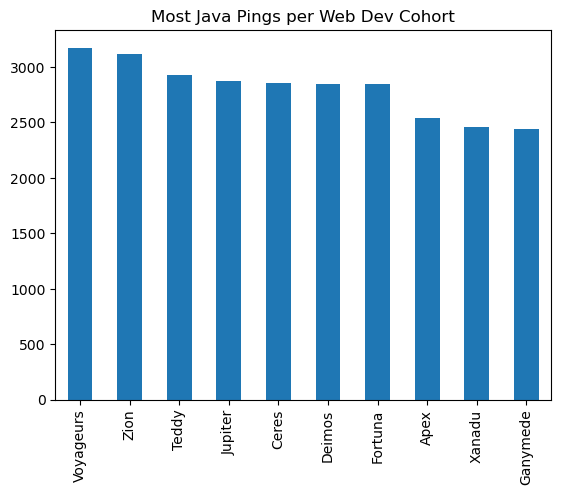

In [409]:
web_java_cohort.plot(kind='bar')
plt.title('Most Java Pings per Web Dev Cohort');

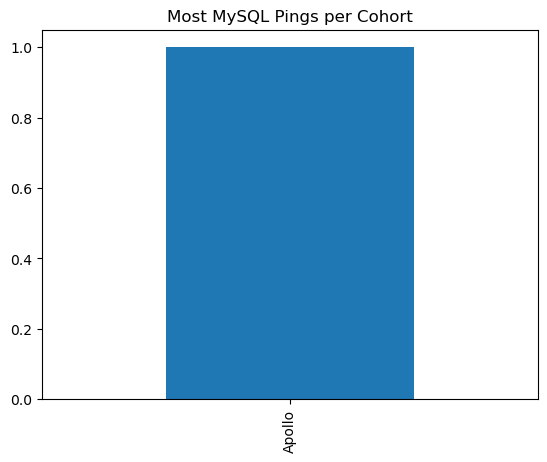

In [268]:
front_images_cohort.plot(kind='bar')
plt.title('Most MySQL Pings per Cohort');

### 3.At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
* evidence of students accessing different materials during 2018-2020. It was difficult to determine, by program_id, which students belonged to which known codeup program. Knowing that data science began in 2019 helped to determine the proper program names.

In [322]:
df_date = df.set_index('start_date')
df_date = df_date.sort_index()
df_date

,path,user_id,cohort_id,ip,cohort,end_date,created,updated,program_id,access_date,program,lesson,endpoint
start_date,,,,,,,,,,,,,
2014-02-04,jquery/mapbox-api,64,28,71.150.217.33,Staff,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2021-04-21 16:44:39,web dev,jquery,mapbox-api
2014-02-04,mysql/sample-database,545,28,12.106.208.194,Staff,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2020-02-06 11:41:15,web dev,mysql,sample-database
2014-02-04,java-iii,545,28,12.106.208.194,Staff,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2020-02-06 11:41:29,web dev,NaN,java-iii
2014-02-04,java-iii/jdbc,545,28,12.106.208.194,Staff,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2020-02-06 11:41:31,web dev,java-iii,jdbc
2014-02-04,appendix/cli/7-more-topics,11,28,97.105.19.58,Staff,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2020-02-06 11:43:50,web dev,cli,7-more-topics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,javascript-i/conditionals,964,139,173.174.134.234,Oberon,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,2021-04-20 13:41:10,web dev,javascript-i,conditionals
2021-04-12,javascript-i/introduction/operators,966,139,136.50.72.144,Oberon,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,2021-04-15 13:35:22,web dev,introduction,operators
2021-04-12,javascript-i/introduction/primitive-types,966,139,136.50.72.144,Oberon,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,2,2021-04-15 13:35:20,web dev,introduction,primitive-types


In [389]:
df_date_2018 = df_date[df_date.index.year == 2018]
df_date_2019 = df_date[df_date.index.year == 2019]
df_date_2020 = df_date[df_date.index.year == 2020]
df_date_2021 = df_date[df_date.index.year == 2021]

In [379]:
wd_2018 = df_date_2018[(df_date_2018.program == 'web dev')&(df_date_2018['cohort'] != 'Staff')&(df_date_2018['lesson'] != '')].endpoint.value_counts().tail(10)
wd_2018

inheritance.html            1
traversing.html             1
php                         1
codeup-exercises            1
tech-talk                   1
2-introduction-to-python    1
1-mysql-overview            1
3-tableau                   1
cssasxz                     1
quiz118                     1
Name: endpoint, dtype: int64

In [380]:
wd_2019 = df_date_2019[(df_date_2019.program == 'web dev')&(df_date_2019['cohort'] != 'Staff')&(df_date_2019['lesson'] != '')].endpoint.value_counts().tail(10)
wd_2019

word-2-vec.md                             1
chart-types                               1
inventory.json                            1
2.8-feature-scaling                       1
introduction_to_java                      1
2.1-probability_and_event_interactions    1
2-inferential-stats                       1
2.5-distributions-and-testing             1
2.4-power-analysis                        1
useful_libraries                          1
Name: endpoint, dtype: int64

In [381]:
wd_2020 = df_date_2020[(df_date_2020['program'] == 'web dev')&(df_date_2020['cohort'] != 'Staff')&(df_date_2020['lesson'] != '')].endpoint.value_counts().tail(10)
wd_2020

boostrap-grid-system                              1
main-pages_xXxXx.html                             1
g                                                 1
project-proposal                                  1
slidesexceptions_and_errorhandlings               1
exceptions_and_errorhandlings                     1
exceptions_and_error_handlings                    1
javascri                                          1
apendix                                           1
working-with-dat-types-operators-and-variables    1
Name: endpoint, dtype: int64

## Parking Lot

In [320]:
df[(df['end_date'] >= df['access_date'])].ip.value_counts(ascending=False)

97.105.19.58       229087
97.105.19.61        52122
192.171.117.210      7984
67.11.50.23          4181
172.124.67.93        3488
                    ...  
107.77.198.177          1
107.77.217.211          1
99.203.27.77            1
172.56.6.73             1
184.226.114.60          1
Name: ip, Length: 3629, dtype: int64

In [391]:
df[df['ip']=='97.105.19.58'].program.value_counts()

web dev         246484
data science     22164
Name: program, dtype: int64

In [392]:
# ips pinging from web dev and data science

In [398]:
df[df['ip']=='97.105.19.58'].access_date.min()

Timestamp('2018-07-16 07:51:57')

In [399]:
df_date_2019[(df_date_2019.program == 'web dev')&(df_date_2019['cohort'] != 'Staff')&(df_date_2019['lesson'] != '')].ip.value_counts().tail(10)

107.77.222.231     1
173.149.241.156    1
184.203.143.190    1
107.77.218.210     1
107.77.222.175     1
107.77.217.125     1
107.77.221.97      1
107.77.217.81      1
172.58.111.5       1
104.223.95.92      1
Name: ip, dtype: int64

In [400]:
df[df['ip']=='107.77.222.231']

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
312330,java-iii/servlets,423,32,107.77.222.231,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2,2019-09-01 13:28:16,web dev,java-iii,servlets
753725,fundamentals/spreadsheets-overview,683,59,107.77.222.231,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,2021-02-01 10:23:21,data science,fundamentals,spreadsheets-overview
753787,fundamentals/visualization-with-excel,683,59,107.77.222.231,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,2021-02-01 10:40:27,data science,fundamentals,visualization-with-excel


In [401]:
df[df['ip']=='173.149.241.156']

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
376412,javascript-i,530,52,173.149.241.156,Europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2,2019-11-25 08:43:09,web dev,NaN,javascript-i


In [402]:
df[df['ip']=='184.203.143.190']

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
394274,javascript-i/bom-and-dom,530,52,184.203.143.190,Europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,2,2019-12-27 10:36:32,web dev,javascript-i,bom-and-dom


In [406]:
df[df['ip']=='107.77.218.210']

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
307822,java-iii/user-input,423,32,107.77.218.210,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2,2019-08-27 13:44:26,web dev,java-iii,user-input


In [407]:
df[df['ip']=='107.77.222.175']

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created,updated,program_id,access_date,program,lesson,endpoint
325673,html-css/forms,488,51,107.77.222.175,Deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,2,2019-09-19 08:07:57,web dev,html-css,forms
477090,html-css/css-i/grid/css-grid-in-practice,638,57,107.77.222.175,Ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,2,2020-04-06 19:56:09,web dev,grid,css-grid-in-practice
838487,/,683,59,107.77.222.175,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,2021-04-15 13:33:59,data science,,
838488,timeseries/working-with-time-series-data,683,59,107.77.222.175,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,2021-04-15 13:34:06,data science,timeseries,working-with-time-series-data
838789,timeseries/prep,683,59,107.77.222.175,Darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3,2021-04-15 14:45:22,data science,timeseries,prep
